My goal for the project was to test my understanding of what makes people happy. As you can see in the import.py file, I picked out several variables as proxies for different factors that I thought might be important. In some cases I just wanted to know what the impact was (media and politics for example).

After reading in and cleaning the data in "import.py", I tried to pick out one or two variables in each topic. To do so, I looked at correlation matrices for quantitative variables and boxplot graphs plus chi squared tests for categorical variables.

After picking out a variable, I ran weighted least squares (WLS) regressions to evaluate the relationship between factors and happiness. I chose to use regression analysis because it is simple and interpretable. I chose WLS because it enables the use of the weights provided in the dataset to account for bias in sampling.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "../data/out/full_data_clean.pickle"

data = pd.read_pickle(DATA_PATH)

In [2]:
print(data['happy'].isnull().value_counts())
data.dropna(axis=0, subset=['happy'], inplace=True)

False    372156
True       2573
Name: happy, dtype: int64


In [3]:
data['happy'].describe()

count    372156.000000
mean          7.196278
std           2.029977
min           0.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: happy, dtype: float64

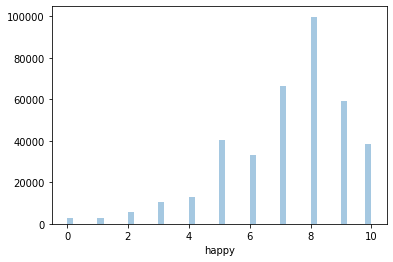

In [4]:
sns.distplot(data['happy'], kde=False)

Happiness has discrete values from 0-10, with a mean of 7.2 and standard deviation of 2.

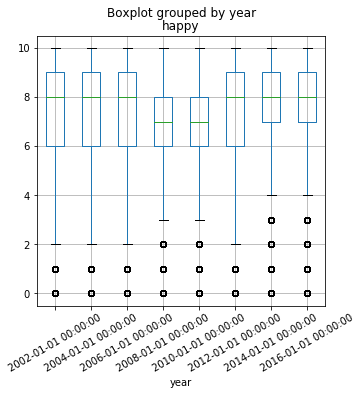

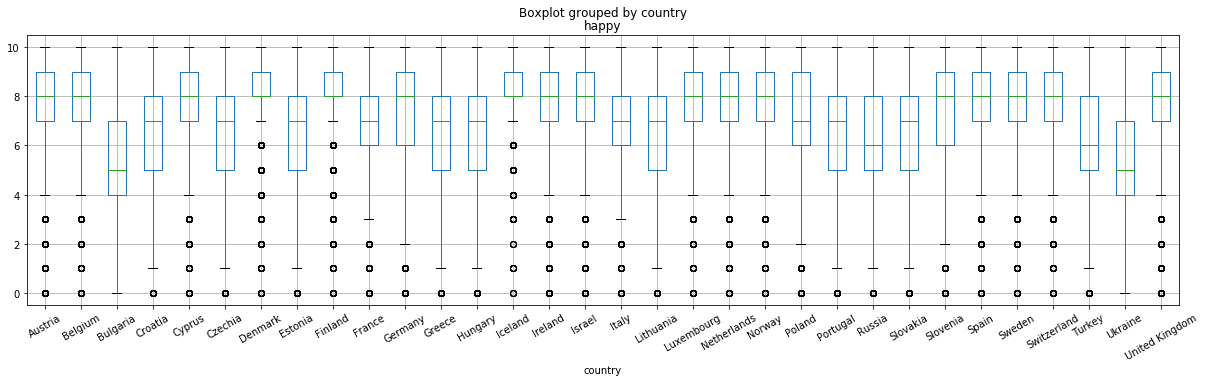

In [6]:
# Year & Country variables
data.boxplot(column='happy', 
             by='year',
             figsize = (5,5),
             grid=True,
             rot = 30)
data.boxplot(column='happy', 
             by='country',
             figsize = (20,5),
             grid=True,
             rot = 30)

Interesting to note:
    1. Notable decrease in happiness in 2006-2008
    2. Nordic countries are the happiest (Denmark, Finland, Iceland)
    3. Ukraine and Bulgaria are the least happy

In [19]:
# WLS regression setup
def get_wls_data(data, endog, num_exog, cat_exog, weight):
    """ 
    Returns components for wls regression 
    (endog series, exog matrix, weight series)
    """
    assert(isinstance(endog, str))
    assert(isinstance(num_exog, list))
    assert(isinstance(cat_exog, list))
    assert(isinstance(weight, str))
    cols = num_exog + cat_exog + [endog, weight]
    subset = data[cols]
    subset_wdummies = pd.get_dummies(
        subset, 
        prefix=cat_exog, 
        columns=cat_exog, 
        dummy_na=False, 
        drop_first=True
    )
    subset_wdummies.dropna(axis=0, how='any', inplace=True)
    exog_df = subset_wdummies.drop([endog, weight], axis=1)
    X = sm.add_constant(exog_df)
    y = subset_wdummies[endog]
    weight = subset_wdummies[weight]
    return y, X, weight

In [20]:
y, X, weight = get_wls_data(data, 'happy', [], ['country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.106
Model:                            WLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1424.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:20:49   Log-Likelihood:            -7.8974e+05
No. Observations:              372156   AIC:                         1.580e+06
Df Residuals:                  372124   BIC:                         1.580e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7.5409      0.018    410.249      0.000       7.505       7.577
country_Belgium            0.1579      0.024      6.506      0.000       0.110       0.206
country_Bulgaria          -1.9456      0.028    -69.765      0.000      -2.000      -1.891
country_Croatia           -0.7229      0.039    -18.684      0.000      -0.799      -0.647
country_Cyprus            -0.0859      0.034     -2.516      0.012      -0.153      -0.019
country_Czechia           -0.6762      0.024    -28.154      0.000      -0.723      -0.629
country_Denmark            0.7580      0.026     29.244      0.000       0.707       0.809
country_Estonia           -0.6726      0.025    -27.276      0.000      -0.721      -0.624
country_Finland            0.4967      0.024     20.978      0.000       0.450       0.543
country_France            -0.2559      0.024    -10.652      0.000      -0.303      -0.209
country_Germany           -0.1763      0.022     -7.946      0.000      -0.220      -0.133
country_Greece            -1.0342      0.027    -38.837      0.000      -1.086      -0.982
country_Hungary           -1.1863      0.025    -48.042      0.000      -1.235      -1.138
country_Iceland            0.6831      0.045     15.336      0.000       0.596       0.770
country_Ireland           -0.0493      0.023     -2.131      0.033      -0.095      -0.004
country_Israel             0.1081      0.024      4.479      0.000       0.061       0.155
country_Italy             -0.5856      0.033    -17.701      0.000      -0.650      -0.521
country_Lithuania         -1.1449      0.028    -41.240      0.000      -1.199      -1.090
country_Luxembourg         0.2987      0.038      7.784      0.000       0.223       0.374
country_Netherlands        0.3141      0.024     13.094      0.000       0.267       0.361
country_Norway             0.4474      0.025     18.112      0.000       0.399       0.496
country_Poland            -0.4850      0.024    -19.861      0.000      -0.533      -0.437
country_Portugal          -0.7624      0.024    -31.676      0.000      -0.810      -0.715
country_Russia            -1.3581      0.025    -54.031      0.000      -1.407      -1.309
country_Slovakia          -0.8935      0.027    -32.695      0.000      -0.947      -0.840
country_Slovenia          -0.3245      0.026    -12.541      0.000      -0.375      -0.274
country_Spain              0.0320      0.024      1.341      0.180      -0.015       0.079
country_Sweden             0.3183      0.024     13.177      0.000       0.271       0.366
country_Switzerland        0.5380      0.024     21.999      0.000       0.490       0.586
country_Turkey            -1.4852      0.035    -42.905      0.000      -1.553      -1.417
country_Ukraine           -1.6810      0.027    -63.156      0.000      -1.733  

In [21]:
y, X, weight = get_wls_data(data, 'happy', [], ['year'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.005
Model:                            WLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     288.4
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:20:59   Log-Likelihood:            -8.0959e+05
No. Observations:              372156   AIC:                         1.619e+06
Df Residuals:                  372148   BIC:                         1.619e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        7.4146      0.010    767.776      0.000       7.396       7.434
year_2004-01-01 00:00:00    -0.1677      0.013    -12.566      0.000      -0.194      -0.142
year_2006-01-01 00:00:00    -0.2014      0.014    -14.798      0.000      -0.228      -0.175
year_2008-01-01 00:00:00    -0.3345      0.013    -25.654      0.000      -0.360      -0.309
year_2010-01-01 00:00:00    -0.3476      0.013    -26.687      0.000      -0.373      -0.322
year_2012-01-01 00:00:00    -0.2165      0.013    -16.576      0.000      -0.242      -0.191
year_2014-01-01 00:00:00     0.0160      0.014      1.150      0.250      -0.011       0.043
year_2016-01-01 00:00:00     0.0565      0.014      4.166      0.000       0.030       0.083
==============================================================================
Omnibus:                    63942.698   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135669.765
Skew:                          -1.021   Prob(JB):                         0.00
Kurtosis:                       5.140   Cond. No.                         9.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on these regressions, year and country clearly explain some of the variation in happiness. Now moving on to the individual factors that I picked out from the dataset:

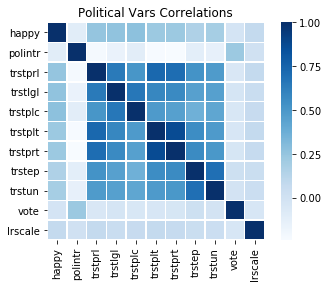

In [22]:
# Correlation heatmap
def get_corr_heatmap(cols, title):
    """ Returns Correlation Heatmap Graph """
    corr_matrix = data[cols].corr()
    ax = plt.axes()
    ax.set_title(title)
    cm = sns.heatmap(corr_matrix,
                    linewidths=0.5,
                    cbar=True,
                    cmap="Blues",
                    xticklabels=True,
                    yticklabels=True,
                    square=True,
                    annot=False,
                    ax=ax)
    cm.set_xticklabels(cm.get_xticklabels(), rotation=90)
    return cm

# Politics Vars
cols = ['happy', 'polintr', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 
        'trstprt', 'trstep', 'trstun', 'vote', 'lrscale']

g = get_corr_heatmap(cols, 'Political Vars Correlations')

For the regression analysis, I only want to include explanatory variables that are independent from each other. In other words, low correlation coefficient in the heat map above.

In [23]:
y, X, weight = get_wls_data(data, 'happy', ['trstplc', 'polintr','lrscale'], ['country', 'year'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.138
Model:                            WLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     1238.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:21:09   Log-Likelihood:            -6.5316e+05
No. Observations:              316512   AIC:                         1.306e+06
Df Residuals:                  316470   BIC:                         1.307e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        6.4931      0.025    261.000      0.000       6.444       6.542
trstplc                      0.1355      0.001     97.963      0.000       0.133       0.138
polintr                     -0.0701      0.004    -18.935      0.000      -0.077      -0.063
lrscale                      0.0602      0.001     40.997      0.000       0.057       0.063
country_Belgium              0.2633      0.024     10.758      0.000       0.215       0.311
country_Bulgaria            -1.4534      0.031    -47.116      0.000      -1.514      -1.393
country_Croatia             -0.3532      0.042     -8.324      0.000      -0.436      -0.270
country_Cyprus               0.1265      0.037      3.445      0.001       0.055       0.198
country_Czechia             -0.4751      0.025    -19.144      0.000      -0.524      -0.426
country_Denmark              0.5779      0.026     22.161      0.000       0.527       0.629
country_Estonia             -0.5565      0.026    -21.647      0.000      -0.607      -0.506
country_Finland              0.2621      0.024     10.964      0.000       0.215       0.309
country_France              -0.1562      0.024     -6.444      0.000      -0.204      -0.109
country_Germany             -0.1684      0.022     -7.486      0.000      -0.213      -0.124
country_Greece              -0.8453      0.028    -29.767      0.000      -0.901      -0.790
country_Hungary             -0.9873      0.026    -38.423      0.000      -1.038      -0.937
country_Iceland              0.4493      0.044     10.164      0.000       0.363       0.536
country_Ireland             -0.0411      0.024     -1.718      0.086      -0.088       0.006
country_Israel               0.2564      0.025     10.321      0.000       0.208       0.305
country_Italy               -0.5061      0.036    -13.915      0.000      -0.577      -0.435
country_Lithuania           -1.0064      0.031    -32.891      0.000      -1.066      -0.946
country_Luxembourg           0.3496      0.041      8.589      0.000       0.270       0.429
country_Netherlands          0.3313      0.024     13.752      0.000       0.284       0.378
country_Norway               0.3493      0.025     14.174      0.000       0.301       0.398
country_Poland              -0.2636      0.025    -10.372      0.000      -0.313      -0.214
country_Portugal            -0.5186      0.026    -20.135      0.000      -0.569      -0.468
country_Russia              -0.9626      0.028    -33.881      0.000      -1.018      -0.907
country_Slovakia            -0.5420      0.029    -19.018      0.000      -0.598      -0.486
country_Slovenia            -0.0919      0.027     -3.344      0.001      -0.146      -0.038
country_Spain                0.1694      0.025      6.887      0.000       0.121       0.218
country_Sweden

**trstplc (trust in police) looks like the strongest indicator here.**

In [ ]:
# Media Vars
cols = ['happy', 'tvtot', 'tvpol', 'netuse']

mcm = get_corr_heatmap(cols, 'Media Vars Correlations')

In [ ]:
# Based on results above, looks like tvtot/tvpol and netuse can be included
y, X, weight = get_wls_data(data, 'happy', ['tvtot', 'netuse'], ['country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

**I keep netuse (internet usage in hours per day) here**

In [ ]:
y, X, weight = get_wls_data(data, 'happy', ['tvpol', 'netuse'], ['country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

In [ ]:
# Satisfaction with government / life
# stflife: satisfied with life
# stfeco: satisfied with economy
# stfgov: satisfied with government
# stfdem: satisfied with democracy
cols = ['happy', 'stflife', 'stfeco', 'stfgov', 'stfdem']

scm = get_corr_heatmap(cols, 'Satisfaction with government / life')

In [ ]:
y, X, weight = get_wls_data(data, 'happy', ['stfdem'], ['country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

**I will keep stfdem here.**

In [ ]:
# Born in Country/Citizenship
data.boxplot(column='happy', 
             by='brncntr_map',
             figsize = (5,5),
             grid=True,
             rot = 30)
data.boxplot(column='happy', 
             by='facntr_map',
             figsize = (5,5),
             grid=True,
             rot = 30)
data.boxplot(column='happy', 
             by='mocntr_map',
             figsize = (5,5),
             grid=True,
             rot = 30)
data.boxplot(column='happy', 
             by='ctzcntr_map',
             figsize = (5,5),
             grid=True,
             rot = 30)

In [ ]:
# Birth / citizenship variables are very likely to be correlated with one another
def get_chi_squared(data, catseries1, catseries2):
    table = sm.stats.Table.from_data(data[[catseries1, catseries2]])
    rslt = table.test_nominal_association()
    contribs = table.chi2_contribs
    return rslt, contribs
    
rslt, contribs = get_chi_squared(data, 'brncntr_map', 'ctzcntr_map')
print(rslt)
print(contribs)
# Null hypothesis of independence is rejected, can only use one of these

In [ ]:
y, X, weight = get_wls_data(data, 'happy', [], ['brncntr_map', 'country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

In [ ]:
y, X, weight = get_wls_data(data, 'happy', [], ['ctzcntr_map', 'country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

**As expected, results are very similar. I'll keep brncntr_map because of the slightly better R2.**

**With more time I would have continued with the remainder of the types of variables (health, income, etc.) to identify the best proxies for these different factors.**

In [ ]:
# again, quick correlation check
cols = ['happy', 'trstplc', 'netuse', 'stfdem']

scm = get_corr_heatmap(cols, 'Numeric Endogenous Vars Check')

In [ ]:
y, X, weight = get_wls_data(data, 'happy', ['trstplc', 'netuse', 'stfdem'], ['brncntr_map', 'country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

**Looks like there might be an issue with multicollinearity with these variables. Including both satisfaction with democracy and trust in police is probably not possible.**

**As a next step I would look to include other indicators (especially wealth and health) and hopefully increase the R2. For now, I conclude that:**
- **trust in police, internet use and satisfaction with democracy have a positive impact on happiness.**
- **being born in the country has a strong positive effect on happiness compared to these other variables.**